## Homework 2

## Amol Dattatray Sangar (asangar)

## P1: De-beeper [5 points]

<div class="alert alert-info">
    
1. x.wav is a speech signal contaminated by a beep sound. As I haven’t taught you guys how to properly do speech enhancement yet, you’re not supposed to know a machine learning-based solution to this problem (don’t worry I’ll cover it soon). Instead, you did learn how to do STFT, so I want you to at least manually erase the beep sound from this signal to recover the clean speech source. If you have a perfect pitch, you might be able to know the pitch of the beep, but I assume that you don’t. That’s why you have to see the spectrogram to find out the beep frequency.


2. First off, create a DFT matrix F using the first equation in M02-S12. You’ll of course create a N × N complex matrix, but if you see its real and imaginary versions separately, you’ll see something like the ones in M02-S14 (the ones in the slide are 20 × 20). Determine your N, which is the frame size shown in M02-S17. For example, since the signal’s sampling rate is 16kHz, if your N is 1600, your frequency resolution (the range a Fourier coefficient covers) will be 10Hz. If your N is large, you’ll get finer frequency resolution and vice versa. Feel free to try out a few different choices, but N = 1600 must be enough.


3. Prepare your data matrix X. You extract the first frame of N samples from the input signal, and apply a Hann window (or any other windows that can overlap-and-add to one). What that means is that from the definition of Hann window1 , you create a window of size N and element-wise multiply the window and your N audio samples. Place it as your first column vector of the data matrix X. Move by N/2 samples. Extract another frame of N samples and apply the window. This goes to the second column vector of X. Do it for your third frame (which should start from (N + 1)’th sample), and so on. Since you moved just by the half of the frame size, your frames are overlapping each other by 50%. 4. Apply the DFT matrix from P1.2 to your data matrix, i.e., F X. This is your spectrogram with complex values. See how it looks like (by taking magnitudes and plotting). Locate two thin horizontal lines. They are from the beep sound. Note that due to the conjugacy your spectrogram is mirrored vertically. The bottom half is a mirrored version of the top half in terms of their magnitudes, although their imaginary parts are with a different sign (complex conjugate). The spectrograms you’ve seen in class are the top half of a spectrogram, because the bottom half has no useful information (except for the flipped phase). This is why you “see” two beeper lines in your spectrogram, although you hear just one beep tone. Anyway, locate them, and make the entire row zero.


5. Apply the inverse DFT matrix, which you can also create by using the equation in M2 S12. Let’s call this F∗. Since it’s the inverse transform, F∗F ≈ I (you can check it, although the off diagonals might be a very small number rather than zero). You apply this matrix to your spectrogram, which is free from the beep tones, to get back to the recovered version of your data matrix, Xˆ . In theory this should give you a real-valued matrix, but you’ll still see some imaginary parts with a very small value. Ignore them by just taking the real part. Reverse the procedure in P1.3 to get the time domain signal. Basically it must be a procedure that transpose every column vector of Xˆ and overlap-and-add the right half of t-th row vector with the left half of the (t + 1)-th row vector and so on. Listen to the signal to check if the beep tones are gone.


6. Submit your code and the de-beepped audio file, by embedding it into your notebook.
</div>

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import io
from scipy import signal
import matplotlib.pyplot as plt
import librosa as lb
import seaborn as sns
from scipy.io import wavfile

C:\Users\AMOL\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\AMOL\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,

### Load Data

In [2]:
samplingFrequency, x = wavfile.read('./x.wav')

### Spectogram of original signal

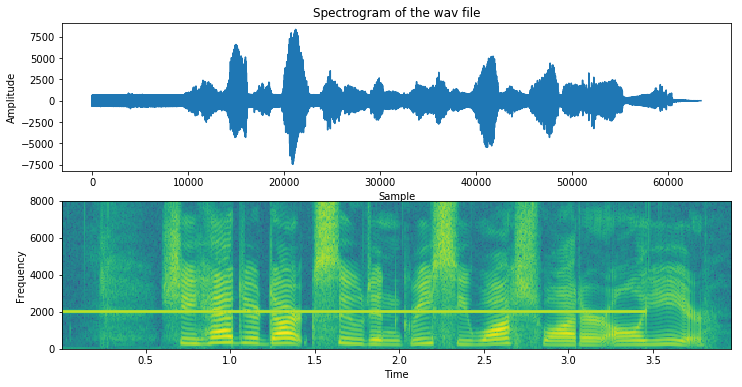

In [3]:
samplingFrequency, signalData = wavfile.read('x.wav')
plt.figure(figsize= (12,6))

plt.subplot(211)
plt.title('Spectrogram of the wav file')

plt.plot(signalData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.specgram(signalData,Fs=samplingFrequency)
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

### DFT Implementation

In [4]:
def dft(size):
    dft_mat = []
    for n in range(0,size):
        temp = []
        for f in range(0,size):
            temp.append(np.exp(-1j * (2 * np.pi * f * n / size)))
        dft_mat.append(temp)
    
    dft_mat = np.array(dft_mat)    
    
    return dft_mat

In [5]:
N = 1600
F = dft(N)
print('DFT matrix shape: ' + str(F.shape))

DFT matrix shape: (1600, 1600)


### Original Signal * Hann Window Multiplication

In [6]:
def hann_window(signal_mat, N):
    hann_w = signal.hann(N)    # Hann Window
    data = []
    
    i = 0
    
    while i + N <= signal_mat.shape[0]:
        data_window = signal_mat[i:i+N] * hann_w    # element-wise multiplication
        data.append(data_window)
        
        i += int(N/2)    # 50% frame overlap
    
    new_data_matrix = np.array(data).T
    
    return new_data_matrix

In [7]:
X = hann_window(x, N)
print('Original frequency matrix: ' + str(x.reshape(-1,1).shape))
print('Matrix shape after applying hanning window: ' + str(X.shape))

Original frequency matrix: (63488, 1)
Matrix shape after applying hanning window: (1600, 78)


### DFT matrix * Hann window matrix multiplication

In [8]:
spectrogram = np.dot(F, X)
spectrogram_abs = np.abs(spectrogram)

In [9]:
spectrogram.shape

(1600, 78)

In [10]:
spectrogram_abs.shape

(1600, 78)

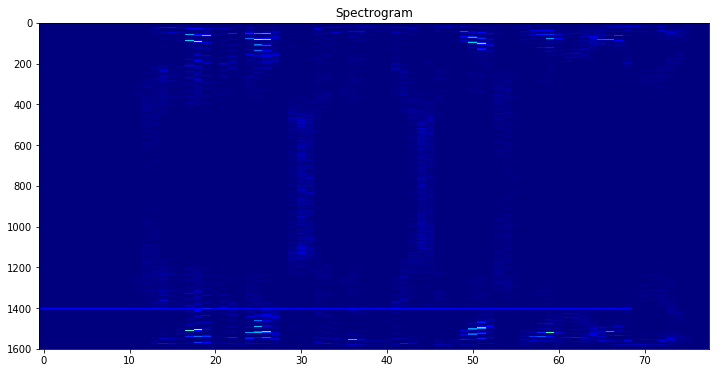

In [11]:
plt.figure(figsize= (12,6))
plt.title("Spectrogram")
plt.imshow(spectrogram_abs, cmap='jet', aspect='auto')
plt.show()

### The solid horizontal line represents the beep sound that is to be removed 

In [12]:
noise = np.mean(spectrogram_abs, axis = 1).reshape(-1,1)
spec_minus_noise = spectrogram_abs - (noise*2)
spec_minus_noise[spec_minus_noise<0] = 0

orig_magnitude = spectrogram * (1 / spectrogram_abs)    # element-wise multiplication
cleaned_spectrogram = orig_magnitude * spec_minus_noise       # element-wise multiplication

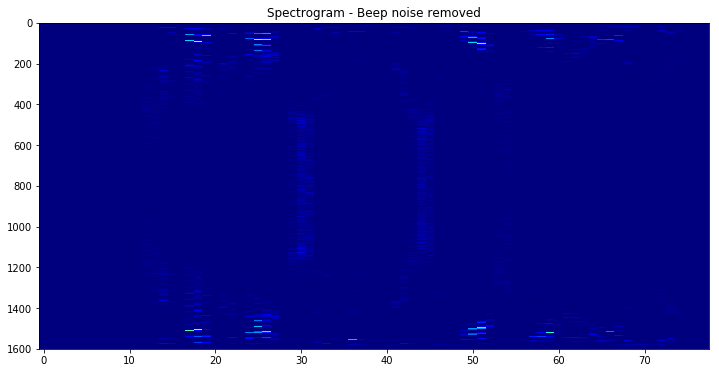

In [13]:
plt.figure(figsize= (12,6))
plt.title("Spectrogram - Beep noise removed")
plt.imshow(spec_minus_noise, cmap='jet', aspect='auto')
plt.show()

### The horizontal line is not present which implies that the beep noise has been removed

### IDFT Implementation

In [14]:
def idft(size):
    dft_mat = []
    for n in range(0,size):
        temp = []
        for f in range(0,size):
            temp.append(np.exp(1j * (2 * np.pi * f * n /size)))
        dft_mat.append(temp)
    
    dft_mat = np.array(dft_mat)    
    
    idft_mat = dft_mat/size
    
    return idft_mat

In [15]:
idft_mat = idft(N)
print('IDFT matrix: ' + str(idft_mat.shape))

IDFT matrix: (1600, 1600)


In [16]:
fstar_f = np.dot(idft_mat, F)
print('F*F == Identity matrix: \n\n' + str(np.abs(np.round(fstar_f.real))))

F*F == Identity matrix: 

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [17]:
new_X = np.dot(idft_mat, cleaned_spectrogram)

In [18]:
def regenerate_original_signal(X, size):

    X_out = X[ :(X.shape[0] - int(size/2)), 0]
    
    for col in range(1,X.shape[1]):
        X_col = X[ (X.shape[0] - int(size/2)):, col-1 ] + X[ 0:int(size/2),col ]
        X_out = np.concatenate( (X_out,X_col) )

    X_out = X_out.reshape(-1) 

    return X_out

In [19]:
recovered_time_signal = regenerate_original_signal(new_X.real, N)

In [20]:
from IPython.display import Audio
print('Original audio file ')
Audio(x, rate = 16000)

Original audio file 


In [21]:
print('De-beeped audio file ')
Audio(recovered_time_signal, rate = 16000)

De-beeped audio file 


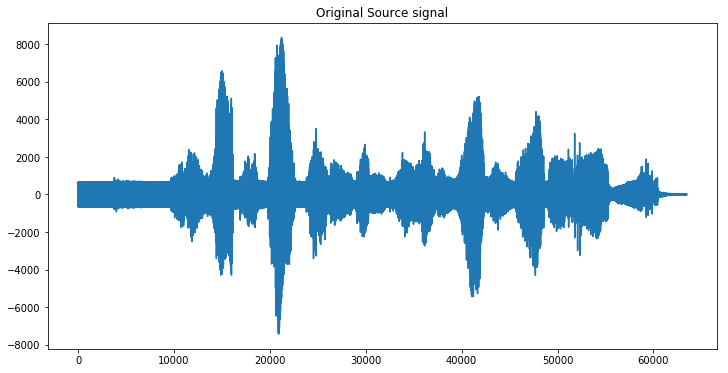

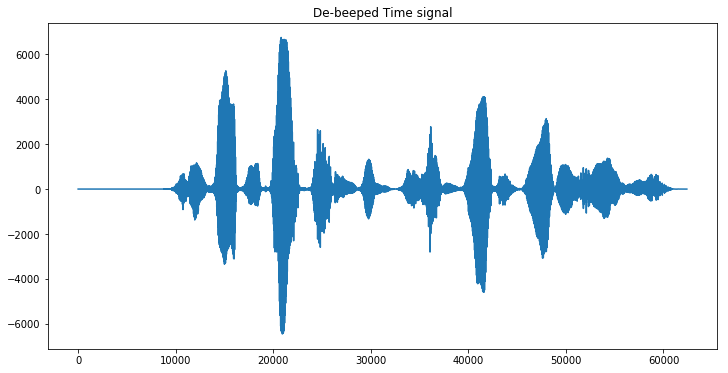

In [22]:
# Original signal
x_range = range(x.shape[0])
plt.figure(figsize= (12,6))
plt.title("Original Source signal")
plt.plot(x_range, x)
plt.show()

# Recovered time signal
x_range = range(recovered_time_signal.shape[0])
plt.figure(figsize= (12,6))
plt.title("De-beeped Time signal")
plt.plot(x_range, recovered_time_signal)
plt.show()

#### In the original audio, we can see that the signal is bulky in the middle whereas its not the case in the beep-free signal. Because of this, the recovered signal is completely free of noise.

## HW2 P2: Parallax [5 points]

#### Load Images

In [23]:
june = io.loadmat('./june')['june']
december = io.loadmat('./december')['december']

In [24]:
print(june.shape)
print(december.shape)

(2700, 2)
(2700, 2)


### Subtracting June vector from the December vector

In [25]:
disparity_vec = december[:,0] - june[:,0]
disparity_vec = disparity_vec.reshape(-1,1)

In [26]:
print('Disparity vector: ' + str(disparity_vec.shape))

Disparity vector: (2700, 1)


### Disparity vector histogram

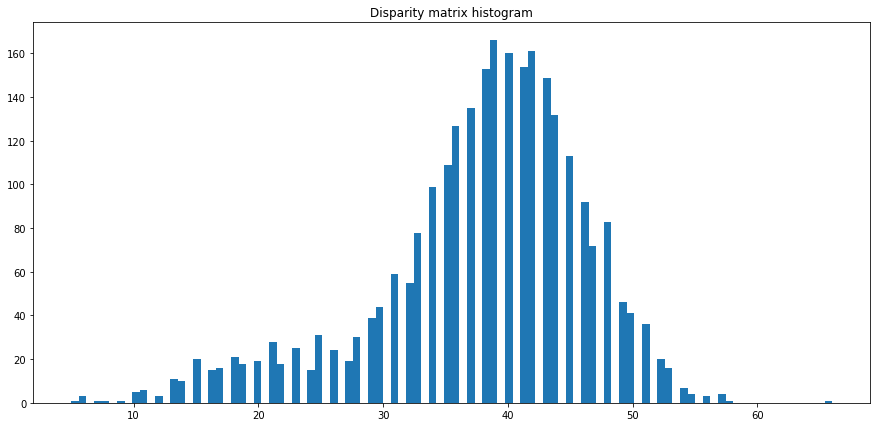

In [27]:
plt.figure(figsize = (15,7))
plt.title('Disparity matrix histogram')
plt.hist(disparity_vec, bins = 100)
plt.show()

### Observation - The histogram show two clusters which can be seen from the varying means of the two overlapping guassian distributions.

In [28]:
class Kmeans:
    def __init__(self, X, k, max_iter=5):
        self.X = X
        self.k = k
        self.max_iter = int(max_iter)
    
    def initialize(self):
        # Randomly initiating two cluster centroids
        self.centroids = np.random.uniform(low = int(min(self.X)), high = int(max(self.X)), size = self.k).reshape(-1,1)
        
        # Initializing class
        self.cluster_class = np.array([[0.0] * self.k] * self.X.shape[0])
        
    def run(self):
        self.initialize()
        
        for j in range(0, self.max_iter):
            for i in range(0, len(self.X)):
                if (np.abs(self.X[i] - self.centroids[0])) < (np.abs(self.X[i] - self.centroids[1])):
                    self.cluster_class[i][0] = 1
                    self.cluster_class[i][1] = 0
                else:
                    self.cluster_class[i][1] = 1
                    self.cluster_class[i][0] = 0

        self.cluster_centroids = np.dot(self.X.T, self.cluster_class)
        self.centroids = (self.cluster_centroids / np.sum(self.cluster_class, axis = 0)).reshape(-1)

        
        return self.get_df()
        
    def get_df(self):
        df = pd.DataFrame(self.X)
        df.columns = ['Disparity Data']
        df['Cluster'] = np.argmax(self.cluster_class, axis = 1)

        return self.centroids, df

In [44]:
km = Kmeans(disparity_vec, 2, 200)
clusters, df = km.run()

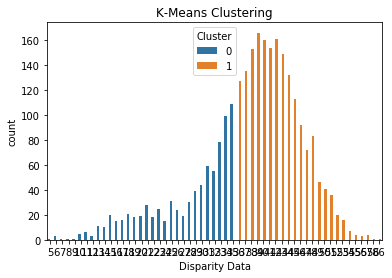

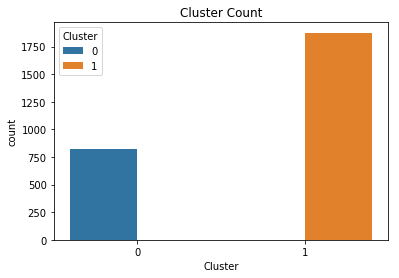

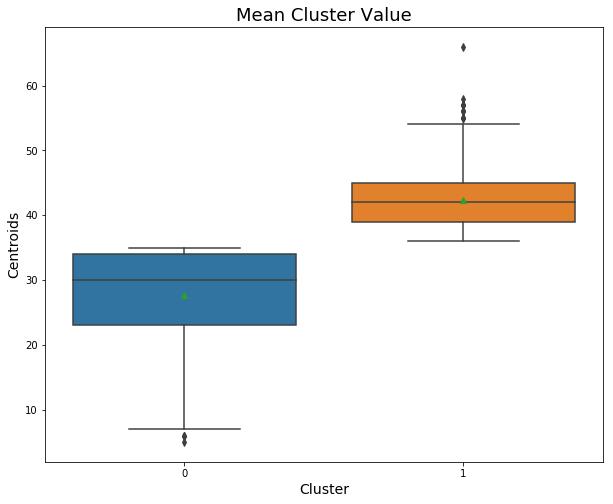

In [45]:
sns.countplot(df['Disparity Data'], hue = df['Cluster']).set_title("K-Means Clustering")
plt.show()

sns.countplot(df['Cluster'], hue = df['Cluster']).set_title("Cluster Count")
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Cluster'], 
            y=df['Disparity Data'], 
            data=df, 
            showmeans=True)
plt.ylabel("Centroids", size=14)
plt.xlabel("Cluster", size=14)
plt.title("Mean Cluster Value", size=18)
plt.show()

In [46]:
print('The cluster centroids are ' + str(round(clusters[0], 3)) + ' and ' + str(round(clusters[1], 3)))

The cluster centroids are 27.743 and 42.312


### The value for cluster 0 is lower than cluster 1 which implies that the cluster 0 (our galaxy) is closer to us than cluster 1 (neighbouring galaxy)

## HW2 P3: GMM for Parallax [5 points]

<div class="alert alert-info">
    
1. Implement your own EM algorithm for GMM and propose an alternative solution to the previous parallax problem. Report the estimated means, variances, and prior weights. Explain which one you prefer between the k-means solution and the GMM results. Justify your answer.

</div>

In [51]:
class GMM:
    def __init__(self, k, prob, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)
        self.prob_A, self.prob_B  = prob

    def initialize(self, X):
        random_row = np.random.randint(int(min(X)), int(max(X)), size=self.k)
        rand_mean = [ X[row_index,:] for row_index in random_row ]
        
        self.mean_A = rand_mean[0]
        self.mean_B = rand_mean[1]
        
        # Initializing with mean values from K-means implementation as the random values is not always converging
        self.mean_A = 27.743
        self.mean_B = 42.312
        
        self.sd_A = np.sqrt(np.cov(X.T))
        self.sd_B = np.sqrt(np.cov(X.T))
                    
    def e_step(self, X):
        self.ll_A = (self.prob_A * self.probX_given_A) / ((self.prob_A * self.probX_given_A) + (self.prob_B * self.probX_given_B))
        self.ll_B = (self.prob_B * self.probX_given_B) / ((self.prob_A * self.probX_given_A) + (self.prob_B * self.probX_given_B))
    
    def m_step(self, X):
        self.prev_mean_A = self.mean_A
        self.prev_mean_B = self.mean_B
        
        self.mean_A = np.sum(self.ll_A * X) / np.sum(self.ll_A)
        self.mean_B = np.sum(self.ll_B * X) / np.sum(self.ll_B)
        
        self.sd_A = np.sqrt(np.sum(self.ll_A * (X - self.mean_A) * (X - self.mean_A))/np.sum(self.ll_A))
        self.sd_B = np.sqrt(np.sum(self.ll_B * (X - self.mean_B) * (X - self.mean_B))/np.sum(self.ll_B))
    
    def predict_proba(self, X):
        self.probX_given_A = self.pdf_dist_normal(self.mean_A, self.sd_A, X)
        self.probX_given_B = self.pdf_dist_normal(self.mean_B, self.sd_B, X)
    
    def pdf_dist_normal(self, mu, sigma, X):
        pdf = (1/np.sqrt((2*np.pi*(sigma**2)))) * (np.exp(-(((X-mu)**2)/(2*(sigma**2)))))
        return pdf
    
    def run_gmm(self, X):
        self.initialize(X)
        
        for iteration in range(self.max_iter):
            self.predict_proba(X)
            self.e_step(X)
            self.m_step(X)
        
        cluster_matrix = np.argmax(np.concatenate((self.ll_A, self.ll_B), axis = 1), axis = 1)
        EM_df = pd.DataFrame(X)
        EM_df.columns = ['Disparity Data']
        EM_df['Cluster'] = cluster_matrix
        
        return EM_df

In [52]:
gmm = GMM(k=2, prob=[0.2,0.8], max_iter=100)
EM_df = gmm.run_gmm(disparity_vec)

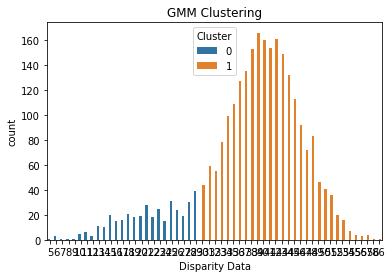

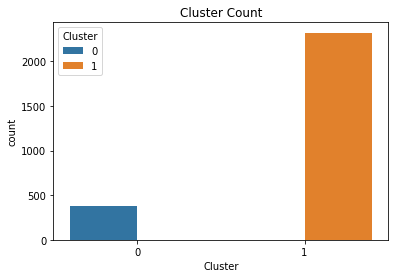

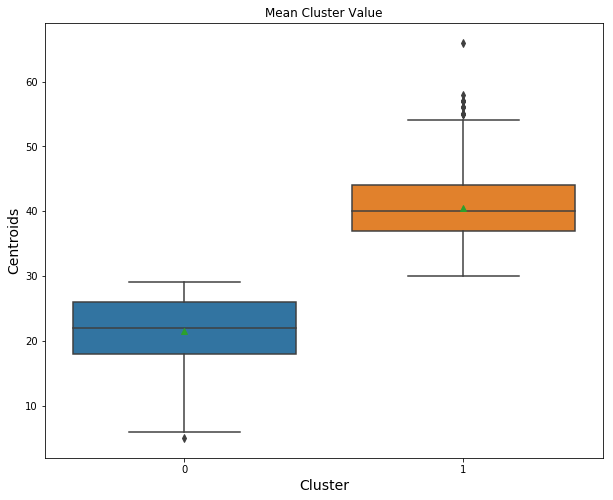

In [53]:
sns.countplot(EM_df['Disparity Data'], hue = EM_df['Cluster']).set_title("GMM Clustering")
plt.show()
sns.countplot(EM_df['Cluster'], hue = EM_df['Cluster']).set_title("Cluster Count")
plt.show()
plt.figure(figsize=(10, 8))
sns.boxplot(x=EM_df['Cluster'], 
            y=EM_df['Disparity Data'], 
            data=EM_df, 
            showmeans=True).set_title("Mean Cluster Value")
plt.ylabel("Centroids", size=14)
plt.xlabel("Cluster", size=14)
plt.show()

In [54]:
print('GMM mean values: ' + str(np.round(gmm.mean_A, 3))+ ' and ' + str(np.round(gmm.mean_B, 3)))
print('GMM standard deviation values: ' + str(np.round(gmm.sd_A, 3))+ ' and ' + str(np.round(gmm.sd_B, 3)))
print('GMM variance values: ' + str(np.round((gmm.sd_A)**2, 3))+ ' and ' + str(np.round((gmm.sd_B)**2, 3)))

GMM mean values: 25.872 and 40.766
GMM standard deviation values: 8.479 and 5.497
GMM variance values: 71.886 and 30.22


#### Running both algorithms multiple times, I observed that the GMM does a better job in clustering the galaxies but only in case of good intial mean values. Thus, running k-means first and using the mean values from it to run GMM produced good results. 

#### The reason GMM works better is because it tries to cluster data in elliptical shape rather than spherical which is the case with k-means algorithm. Since GMM deals with probabilities the decision boudaries it calculates are soft compared to k-means.